# 28 Oct 22 - Deconstructing Signals using Fourier Analysis

One of the most important things we make use of in physics, is the ability to take a complicated piece of infromation and break it down into consituient components that we can undersatnd. One of the principal tools we use for this is the [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform). It has wide use, is well documented, and has lots of support through papers, websites, and computing libraries. As we have discussed, much of the game of deconstructing signals is taking the signal and breaking up into constinuent (e.g., travelling waves). The frequency information and the amplitudes for those broken down waves are in a sense what a Fourier Transform gives you. Below, we do a few transforms using Python to show what happens. We will build these ideas up over a couple classes. 

## What is a Fourier Transform 

In our discussions in class, we have talked about how we can think of complicated signals as being mixes of known and existing signals. See below where we combine the signals of two waves.

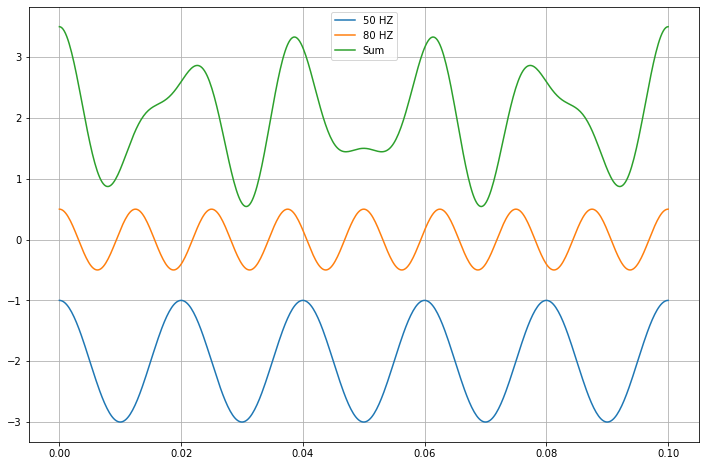

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Number of data points
N = 500

## Time interval is 0 to tf
tf = 0.1

## The spacing is regular, and is precisely (tf-0)/N
dt = tf/N

## Set up time
t = np.linspace(0,tf,N)

## Make two signals and add them together
A = 1
B = 0.5
f1 = 50
f2 = 80

y1 = A*np.cos(2*np.pi*f1*t)
y2 = B*np.cos(2*np.pi*f2*t)
y3 = y1+y2

## Plot plot plot
fig=plt.figure(figsize=(12,8))

plt.plot(t, y1-2, label='50 HZ')
plt.plot(t, y2, label='80 HZ')
plt.plot(t, y3+2, label='Sum')

plt.grid()
plt.legend()

### The Fast Fourier Transform (FFT)

The Fourier Transform is a continuous operation that assumes infinite extent (integral over all frequencies). But the [Discrete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) lets use apply this power tool to a finite data set. This is really useful for all forms of data, and is used widely in astronomy, physics, applied math, engineering, data science, and so on. It is really the Swiss Army Knife of analysis tools for phenomenon with a time domain.

To do this analysis, we can use three functions from the [`scipy.fft` library](https://docs.scipy.org/doc/scipy/tutorial/fft.html):

* [`fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft): Calculates the DFT of the signal. The result includes negative frequency terms because the analysis is done in the complex domain. However, we are typically only concerned with hte positive frequencies, because the result is symmetric. So we often neglect half of the result in visualizing things.
* [`ifft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html#scipy.fft.ifft): given the FFT, this returns the invesrse FFT, which is a close approxiamtion of the original signal. This is really useful if you need to remove noise and then invert the signal so that it is more clean. Lots of applications to audio systems here, like really...guitar pedals are often just signal processes using some sort of FFT or similar transform.
* [`fftfreq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq): given the time domain, this returns the appropraite frequency information that matches the FFT amplitudes. This is a critical part of the analysis because it aligns the FFT vales from ``fft` to the appropriate frequencies. Again, this produces negative frequencies, which we typically ignore in visualizations.

Below, we compute the FFT of the combined signal.

Text(0.5, 1.0, 'Zoomed In')

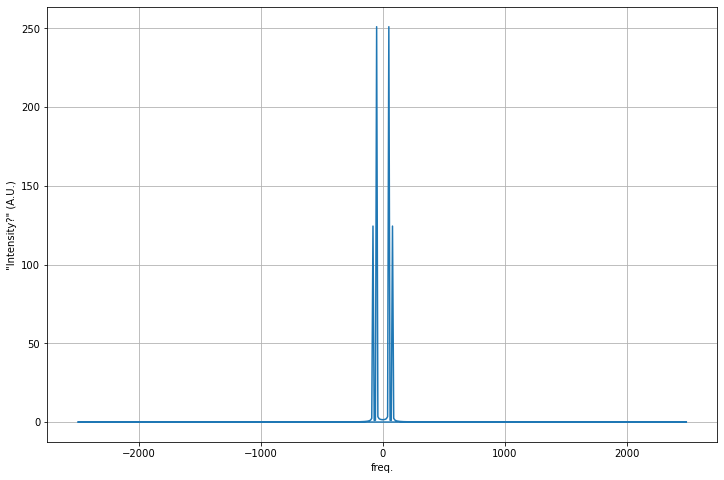

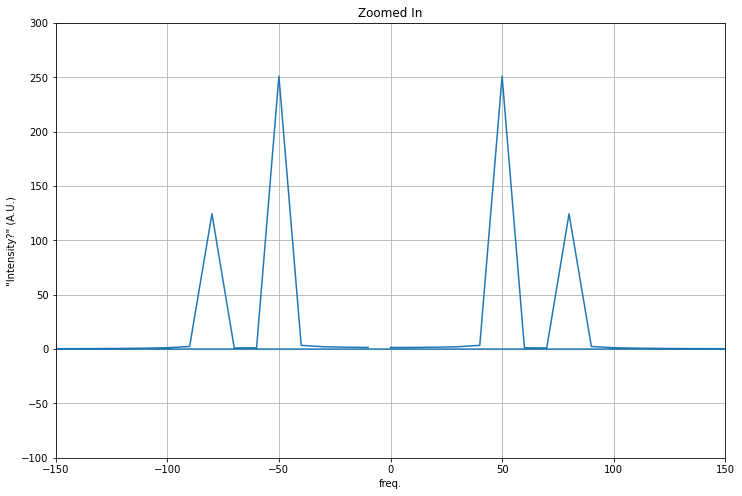

In [2]:
from scipy.fft import fft, ifft, fftfreq ## Import what we need

## We have a few things from earlier to use
## The original signal y3,
## The number of points (N), and 
## their spacing in real time (dt)

## Let's just compute the fft and the frequencies
## It is just a couple calls
yf = fft(y3)
xf = fftfreq(N,dt)

## But let's plot it and you will see the negative frequencies and the scaling issues
## We adjust the limits on the frequency space because with N points and a time domain T
## the maximum frequency in the analysis is half the highest potential frequency
## N = 500; time = 0.1s; smallest division: 0.1/500; thus highest analyzed is: 500/2=250 HZ)

fig=plt.figure(figsize=(12,8))
plt.plot(xf, np.abs(yf))

plt.xlabel('freq.')
plt.ylabel('"Intensity?" (A.U.)')
plt.grid()

fig=plt.figure(figsize=(12,8))
plt.plot(xf, np.abs(yf))

plt.xlabel('freq.')
plt.ylabel('"Intensity?" (A.U.)')
plt.grid()
plt.axis([-150, 150, -100, 300])
plt.title('Zoomed In')

### The Intensity Plot

So, that is what is produced directly from `fft` and `fftfreq`, but how can we make sense of this? 

There's at least two issues, we have negative frequencies as a result of the DFT algorithm; we really only need the positive ones. The other issue is the scale of these plots, the peaks seem to correspond to some number of counts, but we really want it to be closer to the amplitudes we baked in ($A=1$ and $B=0.5$). So we will rescale the FFT and cut out the negative frequencies.

To rescale, it's common to use $\dfrac{2}{N}$ because we are cutting off half the data and rescaling based on total points. Thus, the amplitudes are in arbitrary units that have relative scales that should be close to our inputs; we will test this. Below, we do that analysis.

Text(0.5, 1.0, 'Zoomed In')

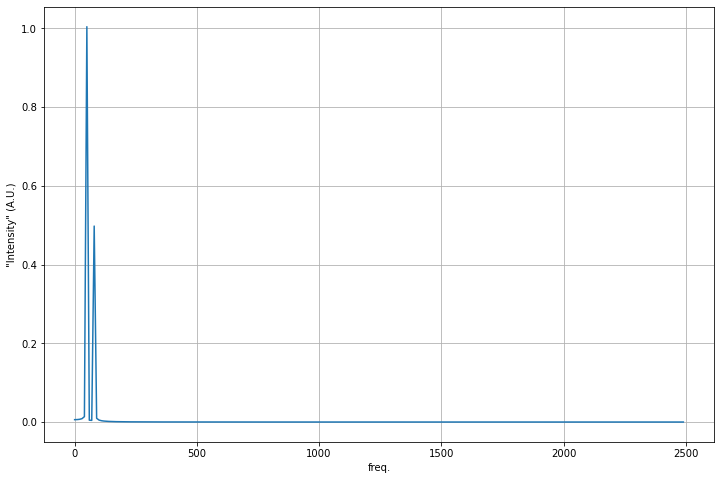

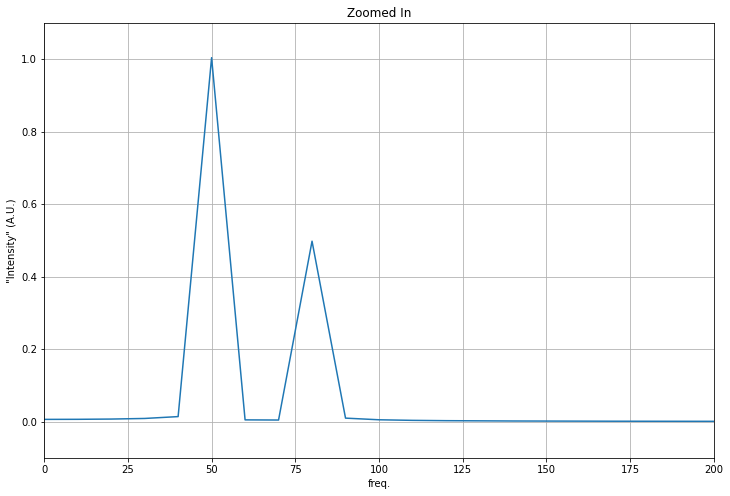

In [3]:
## Let's just compute the fft and the frequencies again
yf = fft(y3)
xf = fftfreq(N,dt)

## Let's cut out the half we want:
xf_pos = xf[0:N//2]         ## Returns the positive half of the frequencies
yf_scaled = 2/N*yf[0:N//2]  ## Rescales the FFT and returns only the positive half again

fig=plt.figure(figsize=(12,8))
plt.plot(xf_pos, np.abs(yf_scaled))

plt.xlabel('freq.')
plt.ylabel('"Intensity" (A.U.)')
plt.grid()

fig=plt.figure(figsize=(12,8))
plt.plot(xf_pos, np.abs(yf_scaled))

plt.xlabel('freq.')
plt.ylabel('"Intensity" (A.U.)')
plt.grid()
plt.axis([0, 200, -0.1, 1.1])
plt.title('Zoomed In')


### What about the amplitude relationships?

We can use the last graph to find the best estimates of our peak values. We divide them to see how their ratio compares to 0.5, which is the ratio of B to A. We find that the estimate is pretty close! So we have some confidence that this can be used on real signals!


In [4]:
## Pick out the peaks
fiftyHZpeakAmp = np.abs(yf_scaled[5])
eightyHZpeakAmp = np.abs(yf_scaled[8])

ratio = eightyHZpeakAmp/fiftyHZpeakAmp
print("The FFT estimates the amplitude relationship (1/2 = 0.5) to be:", ratio)


The FFT estimates the amplitude relationship (1/2 = 0.5) to be: 0.49567286814649275


### What did we just do?

That's a great question. FFTs require a fair amount of mathematics to understand them fully, and the computer obscures or hides that. But intuition about what an FFT does is a bit easier to come by. This really nice 20 minute video from 3Blue1Brown is excellent. I highly recommend watching it. We will go into some of this mathematics in class, but the details will be left to the notes/internet.

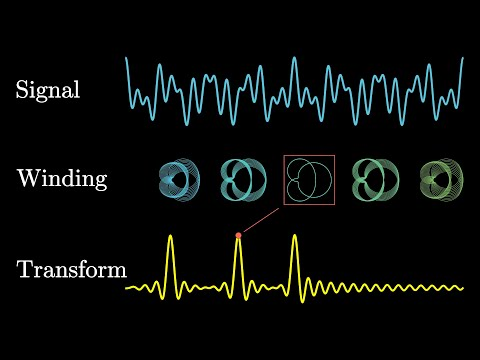

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('spUNpyF58BY', width=800, height=600)